In [1]:
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

from mongo_client import mongo_client

In [2]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

def extract_proper_entities(text):
    proper_entities = []
    nnp_sequence = []
    for word, pos in pos_tag(word_tokenize(text)):
        if pos == 'NNP':
            nnp_sequence.append(word)
        elif len(nnp_sequence) > 1:
            proper_entities.append(' '.join(nnp_sequence))
            nnp_sequence = []
        elif len(nnp_sequence) == 1:
            nnp_sequence = []
    return proper_entities

In [14]:
db = mongo_client.get_database('historical_events')
collection = db.get_collection('event_descriptions')

proper_ents_by_year = {}
proper_ent_set = set()
for year in range(1800, 2013):
    proper_ents = []
    for doc in collection.find({'year': year}):
        text = doc['description'].split('{{')[0]
        proper_ents += extract_proper_entities(text)
    proper_ents_by_year[year] = proper_ents
    proper_ent_set.update(proper_ents)
with open('proper_entities.txt', 'w') as file:
    file.write('\n'.join(proper_ent_set))
proper_ents_by_year[1810]

['Frederick Hasselborough',
 'Campbell Island',
 'Andreas Hofer',
 'André Masséna',
 'Vicente Emparán',
 'Captaincy General',
 'Für Elise',
 'Bill Number',
 'Napoleonic Wars',
 'Lord Byron',
 'May Revolution',
 'Buenos Aires',
 'Apprehending Horse Thieves',
 'John Jacob Astor',
 'Pacific Fur Company',
 'Nicolas Appert',
 'Frederick Hasselborough',
 'Macquarie Island',
 'Santa Cruz',
 'Jean-Baptiste Bernadotte',
 'Crown Prince',
 'New York Harbor',
 'John Jacob Astor',
 'Pacific Fur Company',
 'South America',
 'Columbia River',
 'Miguel Hidalgo',
 'Mexican War',
 'First National Junta',
 'West Florida',
 'Jean Baptiste Bernadotte',
 'Crown Prince Ludwig',
 'Princess Therese',
 'West Florida',
 'United Kingdom',
 'Henri Christophe',
 'Alexandre Pétion',
 'Amadou Lobbo',
 'Chang Pao',
 'Ohio River',
 'Johann Wolfgang von Goethe',
 'George III',
 'United Kingdom',
 'General Union',
 'Saint Petersburg',
 'Russian Empire',
 'Point Manor',
 'West Africa',
 'Sake Dean Mahomet',
 'Hindoostanee

In [15]:
from collections import Counter
y = 1820
c = Counter(proper_ents_by_year[y])

In [16]:
c

Counter({'Trienio Liberal': 2,
         'Indiana University Bloomington': 1,
         'Indiana State Seminary': 1,
         'Indiana College': 1,
         'Imperial Russian Navy': 1,
         'Fabian Gottlieb von Bellingshausen': 1,
         'Mikhail Petrovich Lazarev': 1,
         'George IV': 1,
         'United Kingdom': 1,
         'Windsor Castle': 1,
         'George III': 1,
         'Royal Navy': 1,
         'Edward Bransfield': 1,
         'Lord Cochrane': 1,
         'New York City': 1,
         'Sierra Leone': 1,
         'Minh Mang': 1,
         'Santa María Chiquimula': 1,
         'Daoguang Emperor': 1,
         'Qing Dynasty': 1,
         'Cato Street': 2,
         'Ferdinand VII': 1,
         'Hans Christian': 1,
         'Provisional Governmentquot': 1,
         'BC-125 BC': 1,
         'Yorgos Kentrotas': 1,
         'Pauline Therese': 1,
         'John Stuart Mill': 1,
         'Guglielmo Pepe': 1,
         'Saint Cronan': 1,
         'Boys National School': 1,
     

In [17]:
Counter([n for n in proper_ents_by_year[y] if c[n] > 1])

Counter({'Trienio Liberal': 2, 'Cato Street': 2})

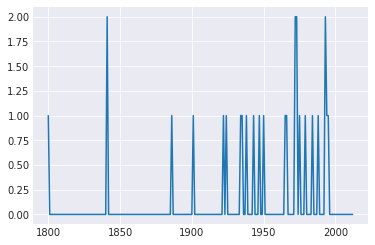

In [18]:
p = 'White House'
x = list(proper_ents_by_year.keys())
y = [Counter(proper_ents_by_year[year])[p] for year in x]
plt.plot(x, y);